In [1]:
# Import dependencies
from re import sub
from decimal import Decimal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import SQL database
from sqlalchemy import create_engine
from config import u_pass
engine = create_engine(f'postgresql://{u_pass}@localhost:5432/employees')
connection = engine.connect()

In [3]:
# Query the salaries table to pull in all salary info.
data = engine.execute("SELECT * FROM salaries")
info = []
for record in data:
    info.append(record)
info

[(10001, '$60,117.00'),
 (10002, '$65,828.00'),
 (10003, '$40,006.00'),
 (10004, '$40,054.00'),
 (10005, '$78,228.00'),
 (10006, '$40,000.00'),
 (10007, '$56,724.00'),
 (10008, '$46,671.00'),
 (10009, '$60,929.00'),
 (10010, '$72,488.00'),
 (10011, '$42,365.00'),
 (10012, '$40,000.00'),
 (10013, '$40,000.00'),
 (10014, '$46,168.00'),
 (10015, '$40,000.00'),
 (10016, '$70,889.00'),
 (10017, '$71,380.00'),
 (10018, '$55,881.00'),
 (10019, '$44,276.00'),
 (10020, '$40,000.00'),
 (10021, '$55,025.00'),
 (10022, '$40,000.00'),
 (10023, '$47,883.00'),
 (10024, '$83,733.00'),
 (10025, '$40,000.00'),
 (10026, '$47,585.00'),
 (10027, '$40,000.00'),
 (10028, '$48,859.00'),
 (10029, '$63,163.00'),
 (10030, '$66,956.00'),
 (10031, '$40,000.00'),
 (10032, '$48,426.00'),
 (10033, '$51,258.00'),
 (10034, '$47,561.00'),
 (10035, '$41,538.00'),
 (10036, '$42,819.00'),
 (10037, '$40,000.00'),
 (10038, '$40,000.00'),
 (10039, '$40,000.00'),
 (10040, '$52,153.00'),
 (10041, '$56,893.00'),
 (10042, '$81,66

In [4]:
# Convert data in info to a df
salaries = pd.DataFrame(data=info, columns=["Emp ID", "Salary"])
salaries.head()

,Emp ID,Salary
0,10001,"$60,117.00"
1,10002,"$65,828.00"
2,10003,"$40,006.00"
3,10004,"$40,054.00"
4,10005,"$78,228.00"


In [5]:
# Determine the data types
salaries.dtypes

Emp ID     int64
Salary    object
dtype: object

In [6]:
# Convert Salary from object/string to float.
# Code adapted from Chris Moffitt @ https://pbpython.com/currency-cleanup.html
salaries['Salary'] = salaries['Salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)
salaries

,Emp ID,Salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0
...,...,...
300019,499995,40000.0
300020,499996,58058.0
300021,499997,49597.0
300022,499998,40000.0


In [7]:
# Determine salary min
sal_min = salaries["Salary"].min()
sal_min

40000.0

In [8]:
# Determine salary max
sal_max = salaries["Salary"].max()
sal_max

129492.0

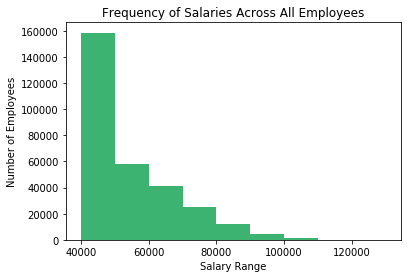

In [9]:
# Create a histogram to visualize the most common salary ranges for employees.
salary = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]
salaries["Salary Range"] = pd.cut(salaries["Salary"], salary, include_lowest=True)
salaries["Salary"].plot(kind="hist", color="mediumseagreen", bins=salary)
plt.xlabel("Salary Range")
plt.ylabel("Number of Employees")
plt.title("Frequency of Salaries Across All Employees")
plt.show()

In [10]:
# Query the the employees, salaries and titles tables by using Inner Joins.
data = engine.execute("SELECT e.emp_no, t.title, s.salary FROM employees e INNER JOIN salaries s ON e.emp_no=s.emp_no INNER JOIN titles t ON e.emp_title_id=t.title_id")
info2 = []
for record in data:
    info2.append(record)
info2

[(10005, 'Staff', '$78,228.00'),
 (10010, 'Engineer', '$72,488.00'),
 (10011, 'Staff', '$42,365.00'),
 (10018, 'Senior Engineer', '$55,881.00'),
 (10035, 'Senior Engineer', '$41,538.00'),
 (10043, 'Senior Engineer', '$49,324.00'),
 (10045, 'Engineer', '$41,971.00'),
 (10058, 'Senior Staff', '$52,787.00'),
 (10078, 'Engineer', '$47,280.00'),
 (10081, 'Senior Engineer', '$55,786.00'),
 (10085, 'Senior Engineer', '$40,000.00'),
 (10096, 'Engineer', '$61,395.00'),
 (10104, 'Senior Staff', '$45,312.00'),
 (10126, 'Staff', '$40,000.00'),
 (10167, 'Senior Engineer', '$56,990.00'),
 (10176, 'Staff', '$54,635.00'),
 (10178, 'Staff', '$50,568.00'),
 (10181, 'Senior Engineer', '$40,000.00'),
 (10185, 'Staff', '$68,334.00'),
 (10228, 'Staff', '$79,474.00'),
 (10231, 'Staff', '$40,000.00'),
 (10232, 'Staff', '$89,606.00'),
 (10244, 'Engineer', '$56,292.00'),
 (10250, 'Senior Engineer', '$50,330.00'),
 (10267, 'Engineer', '$40,000.00'),
 (10278, 'Engineer', '$51,703.00'),
 (10279, 'Engineer', '$40,0

In [11]:
# Convert data in info2 to a df
titles = pd.DataFrame(data=info2, columns=["Emp ID", "Title", "Salary"])
titles.head()

,Emp ID,Title,Salary
0,10005,Staff,"$78,228.00"
1,10010,Engineer,"$72,488.00"
2,10011,Staff,"$42,365.00"
3,10018,Senior Engineer,"$55,881.00"
4,10035,Senior Engineer,"$41,538.00"


In [12]:
# Convert Salary from object/string to float.
# Code adapted from Chris Moffitt @ https://pbpython.com/currency-cleanup.html
titles['Salary'] = titles['Salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)
titles.head()

,Emp ID,Title,Salary
0,10005,Staff,78228.0
1,10010,Engineer,72488.0
2,10011,Staff,42365.0
3,10018,Senior Engineer,55881.0
4,10035,Senior Engineer,41538.0


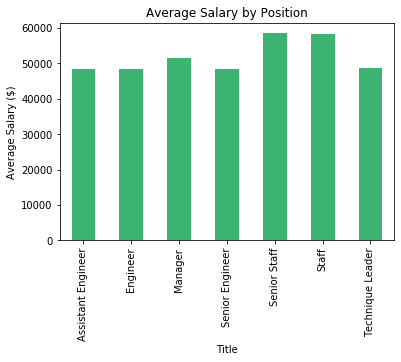

In [13]:
# Create a bar chart of average salary by title.
# Group by title
grouped = titles.groupby(["Title"])
# Determine average salary using grouped object and plot a bar chart.
grouped["Salary"].mean().plot(kind="bar", color="mediumseagreen")
plt.ylabel("Average Salary ($)")
plt.title("Average Salary by Position")
plt.show()